# Распознавание рукописных цифр из набора данных MNIST с помощью Keras


Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [ ]:
!pip install Pillow

In [ ]:
!pip install scipy==1.2.2

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных с рукописными цифрами**

In [ ]:
# В Keras встроены средства работы с популярными наборами данных
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


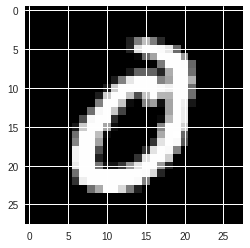

In [ ]:
n = 1304
plt.imshow(toimage(x_train_org[n]).convert('RGBA'))
plt.show()

**Преобразование размерности данных в наборе**

In [ ]:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

**Нормализация данных**

In [ ]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train.astype('float32')
x_train = x_train / 255 

**Работа с правильными ответами**

In [ ]:
print(y_train_org[n])

3


**Преобразуем метки в формат one hot encoding**

In [ ]:
y_train = utils.to_categorical(y_train_org, 10)

**Правильный ответ в формате one hot encoding**

In [ ]:
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [ ]:
model = Sequential()

**Добавляем уровни сети**

Архитектуру сети взяли по ссылке - https://en.wikipedia.org/wiki/MNIST_database


In [ ]:
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [ ]:
model.fit(x_train, y_train, batch_size=200, epochs=20,  verbose=1)

Epoch 1/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.2771 - acc: 0.9210
Epoch 2/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.1111 - acc: 0.9683
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0720 - acc: 0.9790
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0512 - acc: 0.9853
Epoch 5/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0375 - acc: 0.9896
Epoch 6/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0281 - acc: 0.9919
Epoch 7/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0199 - acc: 0.9949
Epoch 8/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0145 - acc: 0.9969
Epoch 9/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0109 - acc: 0.9977
Epoch 10/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0084 - acc: 0.9984

## Сохраняем обученную нейронную сеть

Записываем обученную нейронную сеть в файл `mnist_dense.h5`

In [ ]:
model.save("mnist_dense.h5")


Проверяем, что файл сохранился

In [ ]:
!ls

mnist_dense.h5	sample_data


**Сохраняем файлы на локальный компьютер**

In [ ]:
files.download("mnist_dense.h5")

Если хотите использовать обученную нейронную сеть на своем компьютере:

```
from keras.models import load_model
model = load_model('mnist_dense.h5')
```

## Используем сеть для распознавания рукописных цифр

In [ ]:
n_rec = 487

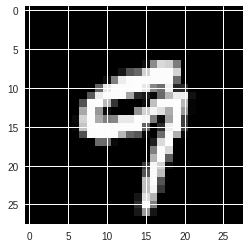

In [ ]:
plt.imshow(toimage(x_test_org[n_rec]).convert('RGBA'))
plt.show()

**Меняем размерность изображения и нормализуем его**

In [ ]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [ ]:
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [ ]:
print(prediction)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


**Преобразуем результаты из формата one hot encoding**

In [ ]:
prediction = np.argmax(prediction)
print(prediction)

9


**Печатаем правильный ответ**

In [ ]:
print(y_test_org[n_rec])

9


## Загружаем свою картинку

In [ ]:
files.upload()

Saving 7.png to 7.png


{'7.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x1c\x00\x00\x00\x1c\x08\x06\x00\x00\x00r\r\xdf\x94\x00\x00\x01\xa6IDATx\x9c\xed\x96=k\x02A\x10\x86\xdf\x0b\x11\xb4\x11\x94C\x8bkT\xb0\xb0\xb4\xb2Pt\x1b\x7f\x85\xff@\x90m,,\xed\xb4\xb5\xb2=\x7f\x86\xd8,v\xe2\x07\xf6\xba\xa7\x95\x8a\x85\xad\x82\xb0\x93*\x12\xe3\xd7z\x97\x84\x10\xf2\x963\xef\xf00s;\xc3\x19DD\xf8A\xbd\xfc$\xec\x1f\xe8Y\xf5z\xfd"\xf6\xfa\x8cY\'\xbf\xdb\xed\xd0\xeb\xf5\xd0n\xb7\xb1\\./\xbc7\x81\xf7$\x84\x00c\x0c\x8c\xb1S\xecx<b2\x99\xa0\xdf\xef#\x9f\xcf#\x9b\xcd\x9e\xe5\xdfe\xb8]\x8bk\x1d\xa6R)\x14\x8bE\x84\xc3a\x00\x00\xe7\x1c\xa1P\xe8\xdcK\xdf$\xce9\x99\xa6I\x8e\xe3\x9c\xc5\xbf\x05X\xa9T\xa8P(\x90\x94\xf2"\xf7\xa5@\xa5\x145\x1a\r\x8a\xc7\xe3\xb4\xd9l\xaez\\=\x9akZ\xadV(\x95J\x88D"\x98N\xa7\x08\x06\x83\xd7\x8d^\xbb\x92RR\xb5Z\xa5X,F\xcdf\x93\x94Rw\xfd\x9e\x80\x83\xc1\x80L\xd3$\xce9\xcdf3\xad\x1a\xd7\xc0\xf5zM\x96eQ\xb7\xdb}\xaaNk\x0f?\xef\x9cR\n\x9dN\x07\xc9d\x12\xb9\\N\xbb\x0epyK\x85\x10\x08\x04\x02\'\x98m\xdb\xb0

Проверяем загрузку картинки

In [ ]:
!ls

7.png  mnist_dense.h5  sample_data


Загружаем картинку из файла

In [ ]:
img_path = '7.png'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Показываем картинку

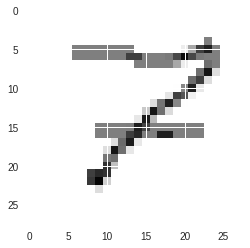

In [ ]:
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [ ]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запускаем распознавание

In [ ]:
prediction = model.predict(x)

Результаты распознавания

In [ ]:
prediction

array([[2.6505633e-09, 2.4530439e-06, 2.5008418e-04, 1.5591946e-02,
        6.9934385e-06, 8.3934792e-06, 1.4922323e-07, 9.8281497e-01,
        1.3247923e-03, 2.6778540e-07]], dtype=float32)

In [ ]:
print(np.argmax(prediction))

7


## Домашнее задание


1.  Сохранить копию ноутбука себе в Google Drive (File->Save a copy in Drive...)
2.  Научитесь запускать ноутбук, обучать сеть и использовать ее для распознавания рукописных цифр MNIST.
3. Попробуйте сами написать рукописную цифру и распознать ее с помощью сети.
4. Попробуйте улучшить качества работы сети.





## Установка Keras и TensorFlow на свой компьютер

Все домашние задания в курсе можно сделать на платформе Google Colaboratory. Ноутбуки с Google Colaboratory останутся у вас после завершения курса, и вы сможете их запускать. Поэтому устанавливать Keras и TensorFlow на свой компьютер для выполнения заданий в курсе не обязательно. Более того, мы не рекомендуем это делать, т.к. установка иногда может быть очень сложной и на нее тратится много времени. Но если вы все-таки хотите установить библиотеки себе, то вот инструкции:

1. [Установка TensorFlow в Anaconda с помощью pip](https://www.asozykin.ru/deep_learning/2018/03/30/TensorFlow-Anaconda-Pip-Install.html).
2. [Установка Keras с TensorFlow в Anaconda](https://www.asozykin.ru/deep_learning/2017/09/07/Keras-Installation-TensorFlow.html).

Сразу хотим предупредить, что инструкции срабатывают не всегда. Но у большинства установить получается.